# Redes Neuronales con Gradiente Descendiente

## Configuración del entorno

In [1]:
!pip install numpy
!pip install matplotlib
!pip install scipy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

## Definición del Gradiente Descendiente

El método de gradiente descendiente podemos modelarlo así:

$$
\theta^{k + 1} = \theta^k - \alpha \nabla L(f_\theta(X), Y)
$$

Los parámetros para optimizar son:
+ $\alpha \leftarrow$ learning rate.
+ $k \leftarrow$ iteraciones (epochs).
+ $f_\theta \leftarrow$ capas. Aquí se pueden aumentar capas o neuronas.

## Implementación de la red

Definimos un conjunto de funciones comunes que nos ayudaran para la construcción de la red y para evaluarla.

In [3]:
def relu(Z):
    return np.maximum(0, Z)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))


def logistic_cost(Y_hat, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(Y_hat + 1e-8) + (1 - Y) * np.log(1 - Y_hat + 1e-8)) / m
    return cost


def prediction(X, Y, b, W):
    A = X
    for i in range(len(W) - 1):
        Z = W[i] @ A + b[i]
        A = relu(Z)
    Z = W[-1] @ A + b[-1]
    Y_hat = sigmoid(Z)
    preds = Y_hat > 0.5
    acc = np.mean(preds == Y)
    print(f"Accuracy: {acc*100:.2f}%")

Cargamos los datos y los visualizamos.

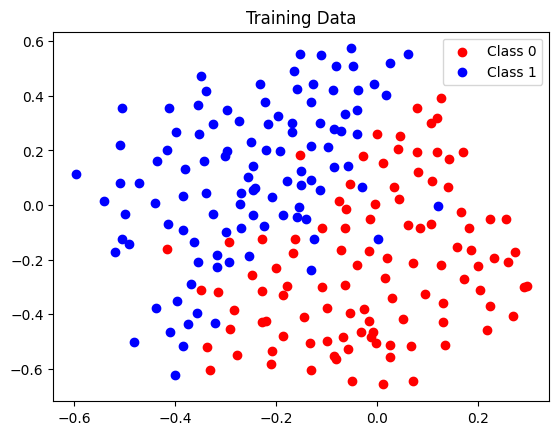

In [4]:
# Load MATLAB data
data = loadmat('../../resources/data/neural-networks/data.mat')

X = data['X'].T
Y = data['y'].T
x_test = data['Xval'].T
y_test = data['yval'].T

# Plot the dataset
plt.figure()
plt.scatter(X[0, Y[0] == 0], X[1, Y[0] == 0], c='red', label='Class 0')
plt.scatter(X[0, Y[0] == 1], X[1, Y[0] == 1], c='blue', label='Class 1')
plt.legend()
plt.title("Training Data")
plt.show()

Definimos la red neuronal, aquí está presente la inicialización de los pesos $W$, el *forward* y el *backward*.

In [5]:
# Define dimensions
m, L = X.shape
c = Y.shape[0]
layers_dims = [m, 10, 3, c]

# Initialization
W = []
b = []
for i in range(1, len(layers_dims)):
    W.append(np.random.randn(layers_dims[i], layers_dims[i-1]) / np.sqrt(layers_dims[i-1]))
    b.append(np.zeros((layers_dims[i], 1)))

learning_rate = 0.5
iteration = 11000
cost = []

# Training Loop
for it in range(iteration):
    # Forward propagation
    Z1 = W[0] @ X + b[0]
    A1 = relu(Z1)
    Z2 = W[1] @ A1 + b[1]
    A2 = relu(Z2)
    Z3 = W[2] @ A2 + b[2]
    A3 = sigmoid(Z3)
    cost.append(logistic_cost(A3, Y))

    # Backpropagation
    dZ3 = A3 - Y
    dW3 = (1/L) * (dZ3 @ A2.T)
    db3 = (1/L) * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = W[2].T @ dZ3
    dZ2 = dA2 * (A2 > 0)
    dW2 = (1/L) * (dZ2 @ A1.T)
    db2 = (1/L) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = W[1].T @ dZ2
    dZ1 = dA1 * (A1 > 0)
    dW1 = (1/L) * (dZ1 @ X.T)
    db1 = (1/L) * np.sum(dZ1, axis=1, keepdims=True)

    # Update weights
    W[0] -= learning_rate * dW1
    b[0] -= learning_rate * db1
    W[1] -= learning_rate * dW2
    b[1] -= learning_rate * db2
    W[2] -= learning_rate * dW3
    b[2] -= learning_rate * db3

Graficamos el resultado de las predicciones de la red.

Performance for training data
Accuracy: 91.94%

Performance for testing data
Accuracy: 95.00%


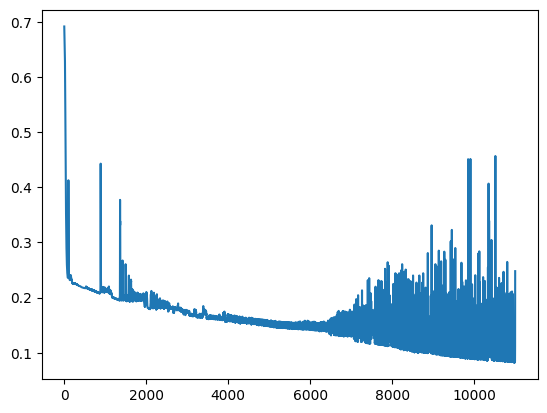

In [6]:
# Final prediction
print("Performance for training data")
prediction(X, Y, b, W)

print("\nPerformance for testing data")
prediction(x_test, y_test, b, W)

plt.plot(cost)